In [1]:
import pandas as pd
import synapseclient
import seaborn as sns
import matplotlib.pyplot as plt

syn = synapseclient.Synapse()
username, password = open('/Users/mauliknariya/synapse_login.txt').read().splitlines()
syn.login(username, password)

sns.set(style='darkgrid', font_scale=1.25)


UPGRADE AVAILABLE

A more recent version of the Synapse Client (2.0.0) is available. Your version (1.9.4) can be upgraded by typing:
    pip install --upgrade synapseclient

Python Synapse Client version 2.0.0 release notes

https://python-docs.synapse.org/build/html/news.html



Welcome, Maulik Nariya!



Text(0.5, 0, 'Number of cell lines')

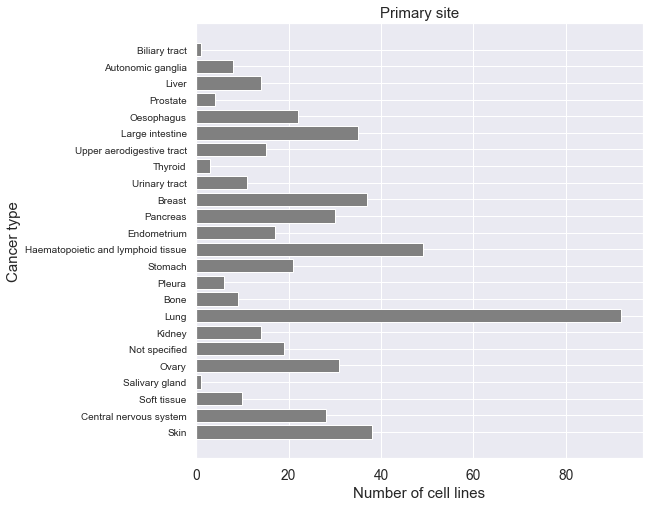

In [2]:
# Cell primary site 
dfcells = pd.read_csv('../resources/cell_info.csv')
dfcells = dfcells.fillna('Not specified')
site_primary = dfcells.site_primary.tolist()
site_names = dfcells.site_primary.unique().tolist()
site_count = [site_primary.count(sn) for sn in site_names]
site_names = [sn.capitalize().replace('_', ' ')
              for sn in site_names]
plt.figure(figsize=(8,8))
plt.barh(width=site_count, y=site_names, color='grey')
plt.title('Primary site')
plt.yticks(fontsize=10)
plt.ylabel('Cancer type')
plt.xlabel('Number of cell lines')

Text(0.5, 0, 'Number of cell lines')

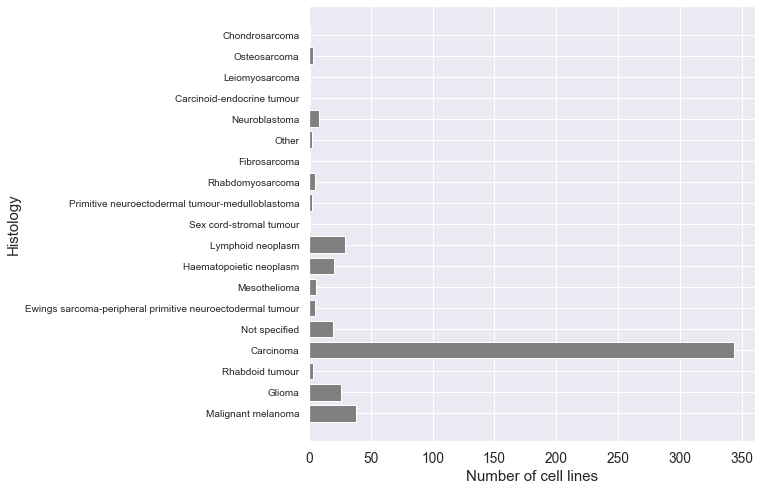

In [3]:
# Cell histology
histology = dfcells.histology.tolist()
hist_names = dfcells.histology.unique().tolist()
hist_count = [histology.count(hn) for hn in hist_names]
hist_names = [hn.capitalize().replace('_', ' ')
              for hn in hist_names]
hist_names
plt.figure(figsize=(8,8))
plt.barh(width=hist_count, y=hist_names, color='grey')
plt.yticks(fontsize=10)
plt.ylabel('Histology')
plt.xlabel('Number of cell lines')

In [4]:
# Basline profile CCLE RNAseq and ACHILLES shRNA
from numpy.random import uniform
dfccle = pd.read_csv(open(syn.get('syn21822697').path), index_col=0).dropna()
dfach = pd.read_csv(open(syn.get('syn21822699').path), index_col=0).dropna()
site_dict = dict(zip(dfcells['cell_line'], dfcells['site_primary']))
random_colors = [(uniform(0,1), uniform(0,1), uniform(0,1)) 
                 for i in range(len(dfcells['site_primary'].unique().tolist()))]

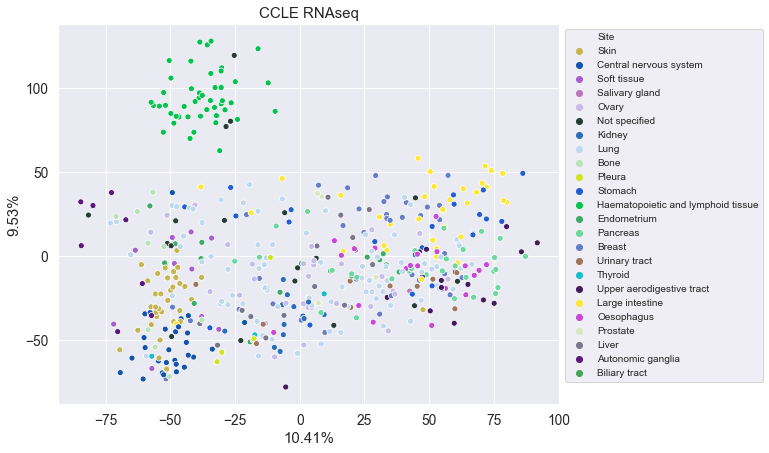

In [5]:
# PCA CCLE RNAseq
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(min(dfccle.shape[0], dfccle.shape[1])-1)
X = dfccle.T.values
Xpca = pca.fit_transform(X)

sites = [site_dict[c] for c in dfccle.columns]
sites = [s.capitalize().replace('_', ' ') for s in sites]

dfpca=pd.DataFrame(list(zip(list(np.asarray(Xpca[:,0])), 
                     list(np.asarray(Xpca[:,1])),
                     sites)), 
                  columns=['PC1', 'PC2', 'Site'])
plt.figure(figsize=(9,7))
sns.scatterplot(data=dfpca, 
                x=dfpca['PC1'], y=dfpca['PC2'],
                hue=dfpca['Site'], palette=random_colors)
variance = pca.explained_variance_ratio_
plt.title('CCLE RNAseq')
plt.xlabel('%.2f%%'%(100*variance[0]))
plt.ylabel('%.2f%%'%(100*variance[1]))
plt.legend(bbox_to_anchor=(1.0,  1.0), fontsize=10)

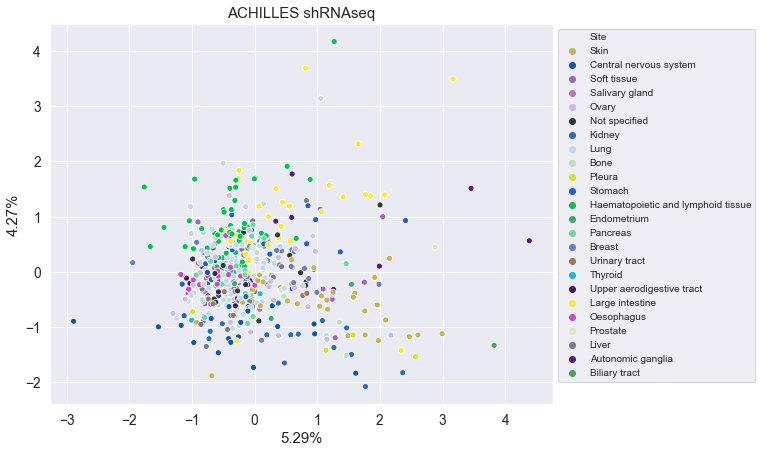

In [6]:
# PCA ACHILLES shRNA
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(min(dfach.shape[0], dfach.shape[1])-1)
X = dfach.T.values
Xpca = pca.fit_transform(X)
variance = pca.explained_variance_ratio_
sites = [site_dict[c] for c in dfach.columns]
sites = [s.capitalize().replace('_', ' ') for s in sites]
dfpca=pd.DataFrame(list(zip(list(np.asarray(Xpca[:,0])), 
                     list(np.asarray(Xpca[:,1])),
                     sites)), 
                  columns=['PC1', 'PC2', 'Site'])
plt.figure(figsize=(9,7))
sns.scatterplot(data=dfpca, 
                x=dfpca['PC1'], y=dfpca['PC2'],
                hue=dfpca['Site'], palette=random_colors)
variance = pca.explained_variance_ratio_
plt.title('ACHILLES shRNAseq')
plt.xlabel('%.2f%%'%(100*variance[0]))
plt.ylabel('%.2f%%'%(100*variance[1]))
plt.legend(bbox_to_anchor=(1.0,  1.0), fontsize=10)

9703


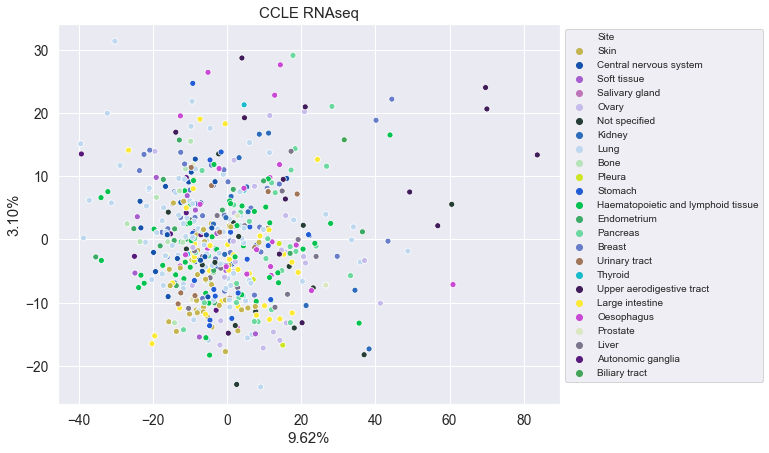

In [7]:
# Feature selected PCA of CCLE RNAseq
from sklearn.decomposition import PCA
import numpy as np
from pca_loadings import pca_loadings
features = pca_loadings(dfccle, cutoff_score=0.25)
print(len(features))
dfccle_feat = dfccle[~dfccle.index.isin(features)]
pca = PCA(min(dfccle_feat.shape[0], dfccle_feat.shape[1])-1)
X = dfccle_feat.T.values
Xpca = pca.fit_transform(X)

sites = [site_dict[c] for c in dfccle.columns]
sites = [s.capitalize().replace('_', ' ') for s in sites]

dfpca=pd.DataFrame(list(zip(list(np.asarray(Xpca[:,0])), 
                     list(np.asarray(Xpca[:,1])),
                     sites)), 
                  columns=['PC1', 'PC2', 'Site'])
plt.figure(figsize=(9,7))
sns.scatterplot(data=dfpca, 
                x=dfpca['PC1'], y=dfpca['PC2'],
                hue=dfpca['Site'], palette=random_colors)
variance = pca.explained_variance_ratio_
plt.title('CCLE RNAseq')
plt.xlabel('%.2f%%'%(100*variance[0]))
plt.ylabel('%.2f%%'%(100*variance[1]))
plt.legend(bbox_to_anchor=(1.0,  1.0), fontsize=10)